In [30]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import seaborn as sns

## Subplots

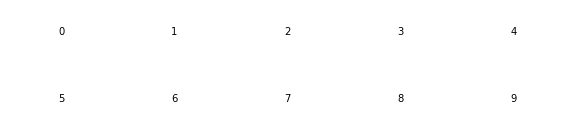

In [24]:
numplots = 10
ROWS = math.ceil(math.sqrt(numplots))  # Quadratic Layout, if in doubt, more Rows than Columns
ROWS = math.floor(math.sqrt(numplots))  # If in doubt, more Columns than Rows
ROWS = 2  # Hard coded
COLS = math.ceil(numplots / ROWS)

fig, axs = plt.subplots(nrows=ROWS, ncols=COLS, sharex=False, sharey=False, figsize=[8, 2])

for i in range(numplots):
    row = i // COLS
    col = i % COLS
    ax = axs[row, col]
    ax.axis('off')
    ax.text(0.5, 0.5, str(i))

plt.tight_layout()

## Relational Plots (inc. Scatters and Regression)

TypeError: lmplot() got an unexpected keyword argument 'title'

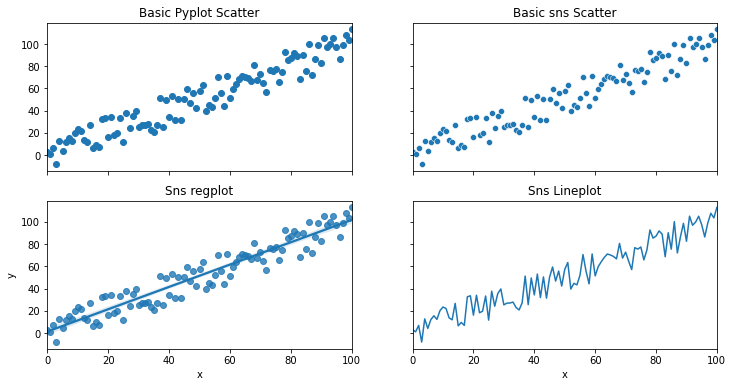

In [54]:
x = np.linspace(0, 100, 101)
y = np.linspace(0, 100, 101) + np.random.rand(101) * 30 - 15
df = pd.DataFrame({'x': x, 'y': y})

nr_examples = 4
ROWS = 2
COLS = math.ceil(nr_examples / ROWS)
fig, axs = plt.subplots(ROWS, COLS, sharex=True, sharey=True, figsize=[12, 6])
[ax0, ax1], [ax2, ax3] = axs

# Pyplot
ax0.set_title('Basic Pyplot Scatter')
ax0.scatter(x, y)

# Seaborn scatter plot
ax1.set_title("Basic sns Scatter")
sns.scatterplot(data=df, x='x', y='y', ax=ax1)

# Seaborn linear regression Scatter (For a convnient wrappers, see lmplot)
ax2.set_title("Sns regplot")
sns.regplot(data=df, x='x', y='y', ax=ax2)

# Seaborn lineplot
ax3.set_title("Sns Lineplot")
sns.lineplot(data=df, x='x', y='y', ax=ax3)

# Improve the looks:
fig, ax = plt.plots()
sns.

plt.tight_layout()

## Style

#### Setting Seaborn contexts and default color palettes. They will also be set for basic pyplots.

In [34]:
sns.set_context('poster')  # paper, notebook, talk, and poster
sns.set_palette('Blues')  # Many, e.g. Reds, CMRmap, rainbow, tab20c, winter, Set1-3...

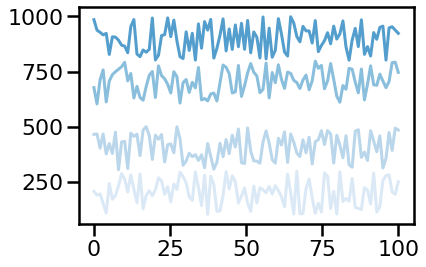

In [38]:
x = np.linspace(0, 100, 100)
y = np.random.randint(0, 1000, size=[100, 4])
y = y * 0.2 + np.asarray([100, 300, 600, 800])
plt.plot(x, y);